Features:

- date (string; datetime of data)
- timestamp (int; number of seconds since beginning of day)
- day_of_week (int; 0 [monday] - 6 [sunday])
- is_weekend (int; 0 or 1) [boolean, if 1, it's either saturday or sunday, otherwise 0]
- is_holiday (int; 0 or 1) [boolean, if 1 it's a federal holiday, 0 otherwise]
- temperature (float; degrees fahrenheit)
- is_start_of_semester (int; 0 or 1) [boolean, if 1 it's the beginning of a school semester, 0 otherwise]
- month (int; 1 [jan] - 12 [dec])
- hour (int; 0 - 23)

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Importing the dataset
df = pd.read_csv('Gym_Data.csv')
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [3]:
df = df.drop("date", axis=1)
df.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,61211,4,0,0,71.76,0,0,8,17
1,45,62414,4,0,0,71.76,0,0,8,17
2,40,63015,4,0,0,71.76,0,0,8,17
3,44,63616,4,0,0,71.76,0,0,8,17
4,45,64217,4,0,0,71.76,0,0,8,17


In [4]:
def time_to_seconds(time):
    return time.hour * 3600 + time.minute * 60 + time.second

In [5]:
noon = time_to_seconds(time(12, 0, 0))
df.timestamp = df.timestamp.apply(lambda t: abs(noon - t))

In [6]:
# one hot encode categorical columns
columns = ["day_of_week", "month", "hour"]
df = pd.get_dummies(df, columns=columns)
df.head(10)

,number_people,timestamp,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,day_of_week_0,day_of_week_1,day_of_week_2,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,37,18011,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,45,19214,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,40,19815,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,44,20416,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,21017,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,46,21618,0,0,72.15,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,43,22808,0,0,72.15,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,53,23409,0,0,72.15,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,54,24014,0,0,72.15,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,43,24615,0,0,72.15,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [7]:
# Extract the training and test data
data = df.values
X = data[:, 1:]  # all rows, no label
y = data[:, 0]  # all rows, label only
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Establish model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)

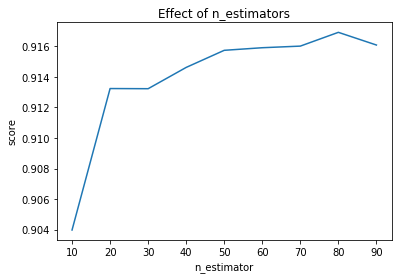

In [10]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 100, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)